In [59]:
# pip install numpy
# pip install pandas

In [60]:
import numpy as np
import pandas as pd

In [61]:
# 데이터 불러오기
train_pd = pd.read_csv('assignment01_train.csv')
test_pd = pd.read_csv('assignment01_test.csv')

In [62]:
# numpy 배열로 변환
train_data = np.array(train_pd)
test_data = np.array(test_pd)

In [63]:
# 데이터 각각 분할 - 단순 선형 회귀 
X_train = train_data[:, 0].reshape(-1,1) 
X_test = test_data[:, 0].reshape(-1,1)
y_train = train_data[:, 3]
y_test = test_data[:, 3]


In [64]:
# 모델 1: 단순 선형 회귀
class LinearRegressionSimple:
    # beta 초기화 함수
    def __init__(self):
        self.beta_0 = 0 # 절편 (beta_0) 초기화
        self.beta_1 = 0 # 기울기 (beta_1) 초기화

    # beta_0와 beta_01을 구하기 위한 함수
    def fit(self, X, y):
        X_mean = np.mean(X) # X 값의 평균 
        y_mean = np.mean(y) # y 값의 평균 
        n = len(X) # 데이터 개수
        
        # 회귀 계수(beta)를 구하기 위한 분자(A), 분모(B) 
        A = 0 # 분자 부분
        B = 0 # 분모 부분
        for i in range(n):
            A += (X[i] - X_mean) * (y[i] - y_mean)
            B += (X[i] - X_mean) ** 2

        self.beta_1 = A / B # 기울기(beta_1) 
        self.beta_0 = y_mean - (self.beta_1 * X_mean) # 절편(beta_0) 
        return self.beta_0, self.beta_1
        

    # 예측 함수 
    def predict(self, X):
        pred = self.beta_0 + (self.beta_1 * X) # 예측값 y = beta0 + beta1 * X
        return pred

    # MSE 측정 함수 
    def mse(self, X, y):
        y_pred = self.predict(X) # 예측값 
        sum = 0
        n = len(y)
        # 평균 제곱 오차(MSE) 계산
        for i in range(n):
          sum += ((y[i]-y_pred[i])**2)
        mse = sum / n
        return mse[0]

    # R2 측정 함수 
    def r2(self, X, y):
        # 예측한 값과 실제값 사이의 제곱 오차의 합
        n = len(y)
        SSR = 0 # 잔차 제곱합
        y_pred = self.predict(X) # 예측값 
        for i in range(n) :
            SSR += ((y[i]-y_pred[i])**2)

        # 예측한 값들의 평균과 실제값들의 평균 사이의 제곱 오차의 합
        y_mean = np.mean(y) # y 값의 평균 
        SST = 0 # 총 제곱합
        for i in range(n) :
            SST += ((y[i]-y_mean)**2)
        r2 = 1 - (SSR / SST) # 결정 계수
        return r2[0]

In [65]:
# 단순 선형 회귀 모델의 학습 및 평가
model1 = LinearRegressionSimple() # 단순 선형 회귀 모델 객체 생성
beta = model1.fit(X_train, y_train) # 학습 데이터로 모델 학습
mse_model1 = model1.mse(X_test, y_test) # 테스트 데이터로 MSE 계산
r2_model1 = model1.r2(X_test, y_test) # 테스트 데이터로 결정 계수 계산

In [66]:
# 결과 출력
print("단순 선형 회귀 모델의 beta_0:", *beta[0])
print("단순 선형 회귀 모델의 beta_1:", *beta[1])
print("단순 선형 회귀 모델의 MSE: {:f}".format(mse_model1))
print("단순 선형 회귀 모델의 R-squared: {:f}".format(r2_model1))

단순 선형 회귀 모델의 beta_0: 6.8509752116381435
단순 선형 회귀 모델의 beta_1: 0.047226522399052395
단순 선형 회귀 모델의 MSE: 14.129203
단순 선형 회귀 모델의 R-squared: 0.483930


In [67]:
# 데이터 각각 분할 - 다중 선형 회귀
X_train = train_data[:, :3]  # 3개의 독립 변수
X_test = test_data[:, :3]
y_train = train_data[:, 3]  # 종속 변수
y_test = test_data[:, 3]

In [68]:
# 모델 2: 다중 선형 회귀
class LinearRegressionMultiple:
    # beta 초기화 함수
    def __init__(self):
        self.beta = 0 # 회귀 계수 (beta) 초기화

    # beta 구하는 함수 
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1) # X 행렬에 1로 채워진 첫 번째 열을 추가
        X_T = np.transpose(X) # X 행렬의 전치
        X_T_x_X = np.dot(X_T, X) # X_T와 X의 행렬 곱
        X_T_x_X_inv = np.linalg.inv(X_T_x_X) # X_T_x_T의 역행렬
        X_T_y = np.dot(X_T, y) # X_T와 y의 행렬 곱

        self.beta = np.dot(X_T_x_X_inv, X_T_y) # 회귀 계수(beta) 계산 : (X_T_x_X)-1 x X_T_y
        # beta에는 4개의 값이 들어있음 (X에 1로 채워진 첫 번째 열을 추가했기 때문에)
        return self.beta

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1) # X 행렬에 1로 채워진 첫 번째 열을 추가 -> beta의 첫번째 값을 제거
        return np.dot(X, self.beta) # 예측값 y = beta * X

    # MSE 측정 함수 
    def mse(self, X, y):
        y_pred = self.predict(X) # 예측값 
        sum = 0
        n = len(y) 
        # 평균 제곱 오차(MSE) 계산
        for i in range(n):
          sum += ((y[i]-y_pred[i])**2)
        mse = sum / n
        return mse

    # R2 측정 함수 
    def r2(self, X, y):
        # 예측한 값과 실제값 사이의 제곱 오차의 합
        n = len(y)
        SSR = 0 # 잔차 제곱합
        y_pred = self.predict(X) # 예측값 
        for i in range(n) :
            SSR += ((y[i]-y_pred[i])**2)

        # 예측한 값들의 평균과 실제값들의 평균 사이의 제곱 오차의 합
        y_mean = np.mean(y) # y 값의 평균
        SST = 0 # 총 제곱합
        for i in range(n) :
            SST += ((y[i]-y_mean)**2)
        r2 = 1 - (SSR / SST) # 결정 계수 계산
        return r2


In [69]:
# 다중 선형 회귀 모델의 학습 및 평가
model2 = LinearRegressionMultiple() # 다중 선형 회귀 모델 객체 생성
beta = model2.fit(X_train, y_train) # 학습 데이터로 모델 학습
mse_model2 = model2.mse(X_test, y_test) # 테스트 데이터로 MSE 계산
r2_model2 = model2.r2(X_test, y_test) # 테스트 데이터로 결정 계수 계산

In [70]:
print("다중 선형 회귀 모델의 beta_0:", beta[0])
print("다중 선형 회귀 모델의 beta_1:", beta[1])
print("다중 선형 회귀 모델의 beta_2:", beta[2])
print("다중 선형 회귀 모델의 beta_3:", beta[3])
print("다중 선형 회귀 모델의 MSE: {:f}".format(mse_model2))
print("다중 선형 회귀 모델의 R-squared: {:f}".format(r2_model2))

다중 선형 회귀 모델의 beta_0: 3.147153440049564
다중 선형 회귀 모델의 beta_1: 0.04645671368495885
다중 선형 회귀 모델의 beta_2: 0.17384947731037848
다중 선형 회귀 모델의 beta_3: -0.003158891807491959
다중 선형 회귀 모델의 MSE: 2.754074
다중 선형 회귀 모델의 R-squared: 0.899407


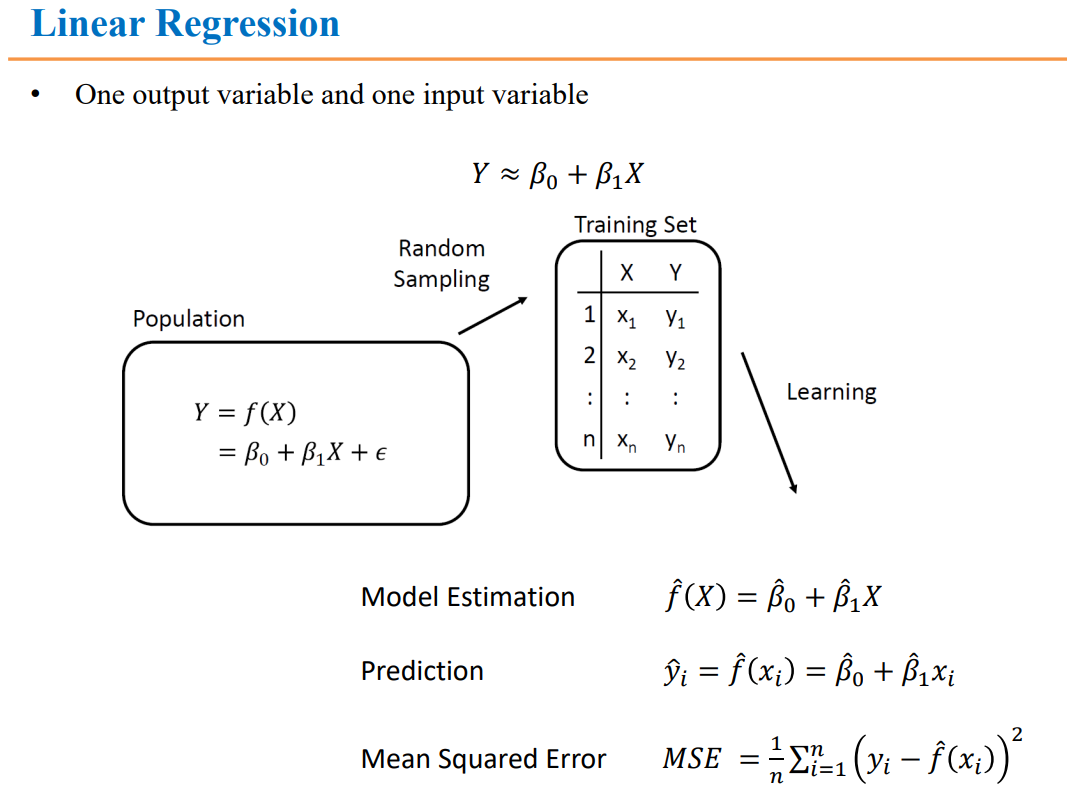

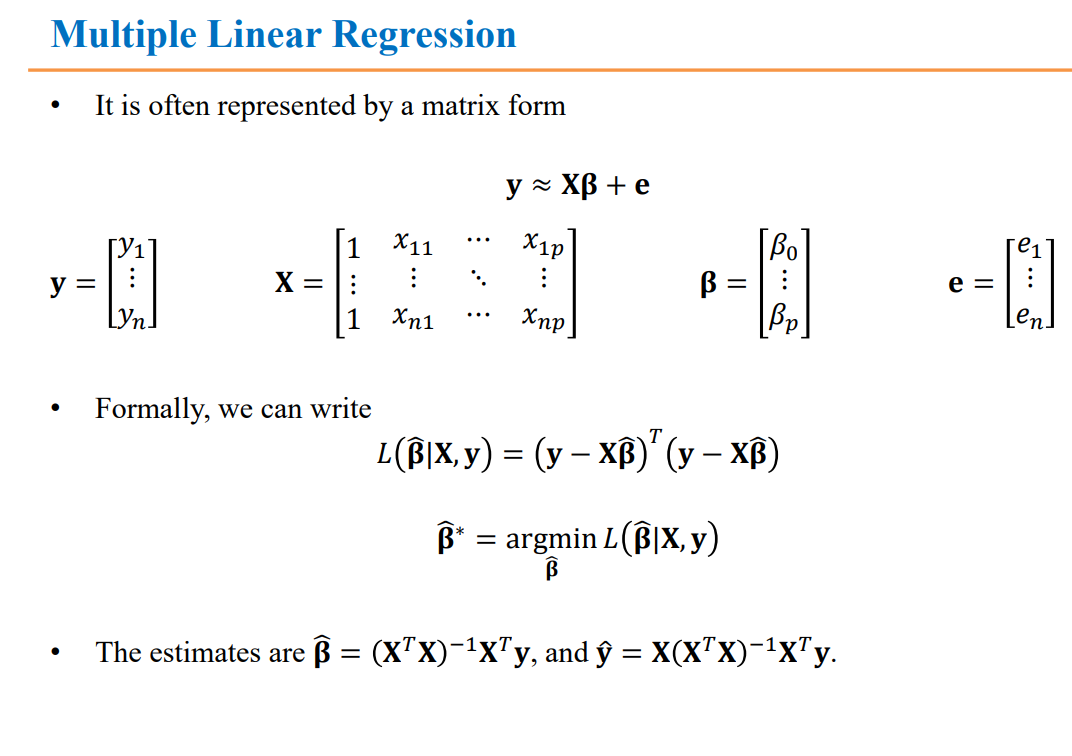